设计FISHER线性分类器

[[-0.01173364]
 [ 0.00885302]] [0.00652695]
[1.  1.5] 为类型1
[1.2 1. ] 为类型1
[2.  0.9] 为类型2
[1.2 1.5] 为类型1
[0.23 2.33] 为类型1


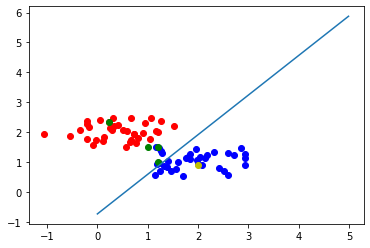

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Fisher线性分类器，输入为两类训练样本
def fisher(x1, x2):
    # 将数据转置
    x1 = x1.T
    x2 = x2.T

    # 1. 求样本均值
    m1 = np.mean(x1, axis=1)
    m2 = np.mean(x2, axis=1)
    m1 = m1.reshape((2, 1))
    m2 = m2.reshape((2, 1))

    # 2. 计算样本类内离散度
    # 第一类样本类内离散度S1
    s1 = np.zeros((x1.shape[0], x1.shape[0]))
    for i in range(0, x1.shape[1]):
        s1 = s1 + np.dot((x1[:, i] - m1), (x1[:, i] - m1).T)
        
    # 第二类样本类内离散度S2
    s2 = np.zeros((x2.shape[0], x2.shape[0]))
    for i in range(0, x2.shape[1]):
        s2 = s2 + np.dot((x2[:, i] - m2), (x2[:, i] - m2).T)

    # 总的类内离散度
    sw = s1 + s2

    # 3. 求类间离散度Sb
    sb = np.dot((m1 - m2), (m1 - m2).T)

    # 4. 计算最优判别权重W*
    w = np.dot(np.linalg.inv(sw), (m1 - m2))

    # 5. 求值W0
    x1_m=0
    x2_m = 0
    for i in range(x2.shape[1]):
        x2_m = x2_m + np.dot(x2[:, i].T, w)
    x2_m = x2_m / x2.shape[1]

# 若未知先验概率
    w0 = -(x1_m * x1.shape[1] + x2_m * x2.shape[1]) / (x1.shape[1] + x2.shape[1])
# 若已知先验概率Pw1 Pw2
# pw1, pw2 = 0.6, 0.4
# w0 = -(x1_m + x2_m) / 2 - math.log((pw1 / pw2), math.e) / (x1.shape[1] + x2.shape[1] - 2)
    return w0, w


if __name__ == '__main__':
    w1 = np.array([
    [0.2331, 2.3385], [1.5207, 2.1946], [0.6499, 1.6730], [0.7757, 1.6365],
    [1.0524, 1.7844], [1.1974, 2.0155], [0.2908, 2.0681], [0.2518, 2.1213],
    [0.6682, 2.4797], [0.5622, 1.5118], [0.9023, 1.9692], [0.1333, 1.8340],
    [-0.5431, 1.8704], [0.9407, 2.2948], [-0.2126, 1.7714], [0.0507, 2.3939],
    [-0.0810, 1.5648], [0.7315, 1.9329], [0.3345, 2.2027], [1.0650, 2.4568],
    [-0.0247, 1.7523], [0.1043, 1.6991], [0.3122, 2.4883], [0.6655, 1.7259],
    [0.5838, 2.0466], [1.1653, 2.0226], [1.2653, 2.3757], [0.8137, 1.7987],
    [-0.3399, 2.0828], [0.5152, 2.0798], [0.7226, 1.9449], [-0.2015, 2.3801],
    [0.4070, 2.2373], [-0.1717, 2.1614], [-1.0573, 1.9235], [-0.2099, 2.2604]])
    w2 = np.array([
    [1.4010, 1.0298], [1.2301, 0.9611], [2.0814, 0.9154], [1.1655, 1.4901],
    [1.3740, 0.8200], [1.1829, 0.9399], [1.7632, 1.1405], [1.9739, 1.0678],
    [2.4152, 0.8050], [2.5890, 1.2889], [2.8472, 1.4601], [1.9539, 1.4334],
    [1.2500, 0.7091], [1.2864, 1.2942], [1.2614, 1.3744], [2.0071, 0.9387],
    [2.1831, 1.2266], [1.7909, 1.1833], [1.3322, 0.8798], [1.1466, 0.5592],
    [1.7087, 0.5150], [1.5920, 0.9983], [2.9353, 0.9120], [1.4664, 0.7126],
    [2.9313, 1.2833], [1.8349, 1.1029], [1.8340, 1.2680], [2.5096, 0.7140],
    [2.7198, 1.2446], [2.3148, 1.3392], [2.0353, 1.1808], [2.6030, 0.5503],
    [1.2327, 1.4708], [2.1465, 1.1435], [1.5673, 0.7679], [2.9414, 1.1288]])

    W0, W= fisher(w1, w2)
    print(W, W0)
    # 画出分界线
    x = np.arange(0, 5, 0.01)
    y = (-W[0, 0]*x - W0) / W[1, 0]
    plt.plot(x, y.reshape(-1, 1))

    # 画出训练样本数据点
    plt.scatter(np.array(w1[:, 0]), np.array(w1[:, 1]),c="r")
    plt.scatter(np.array(w2[:, 0]), np.array(w2[:, 1]),c="b")

    # 测试样本
    x_test = np.array([[1, 1.5],[1.2, 1.0], [2.0, 0.9], [1.2, 1.5], [0.23, 2.33]])
    for i in range(x_test.shape[0]):
        res = np.dot(W.T, x_test[i].T) + W0
        if res > 0:
            print(x_test[i], "为类型1")
            plt.scatter(x_test[i, 0], x_test[i, 1], c="g")
        else:
            print(x_test[i], "为类型2")
            plt.scatter(x_test[i, 0], x_test[i, 1], c="y")
    plt.show() 
